# Seminar 4

On this seminar, we will on Wi-Fi performance, specifically, how to address this topic usinc NNs


### Part 1 Data Visualization

,LocationNumber,RSSI,TxLinkSpeed,RxLinkSpeed,MainAPConnect,TxThroughput,AvgPingLatency
count,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000
mean,18.252500,-62.392752,490.784789,460.786707,0.910833,12.904876,54.679929
std,10.396517,9.574595,242.528150,253.640807,0.285001,4.436742,8.745980
min,1.000000,-78.680000,45.640000,-24.270000,0.000000,1.030000,39.320000
25%,9.000000,-70.620000,264.327500,248.700000,1.000000,11.140000,48.910000
50%,18.000000,-62.980000,475.230000,396.785000,1.000000,14.710000,52.270000
75%,27.000000,-53.600000,666.142500,658.340000,1.000000,15.930000,57.375000
max,36.000000,-37.270000,904.920000,907.340000,1.000000,19.110000,96.430000


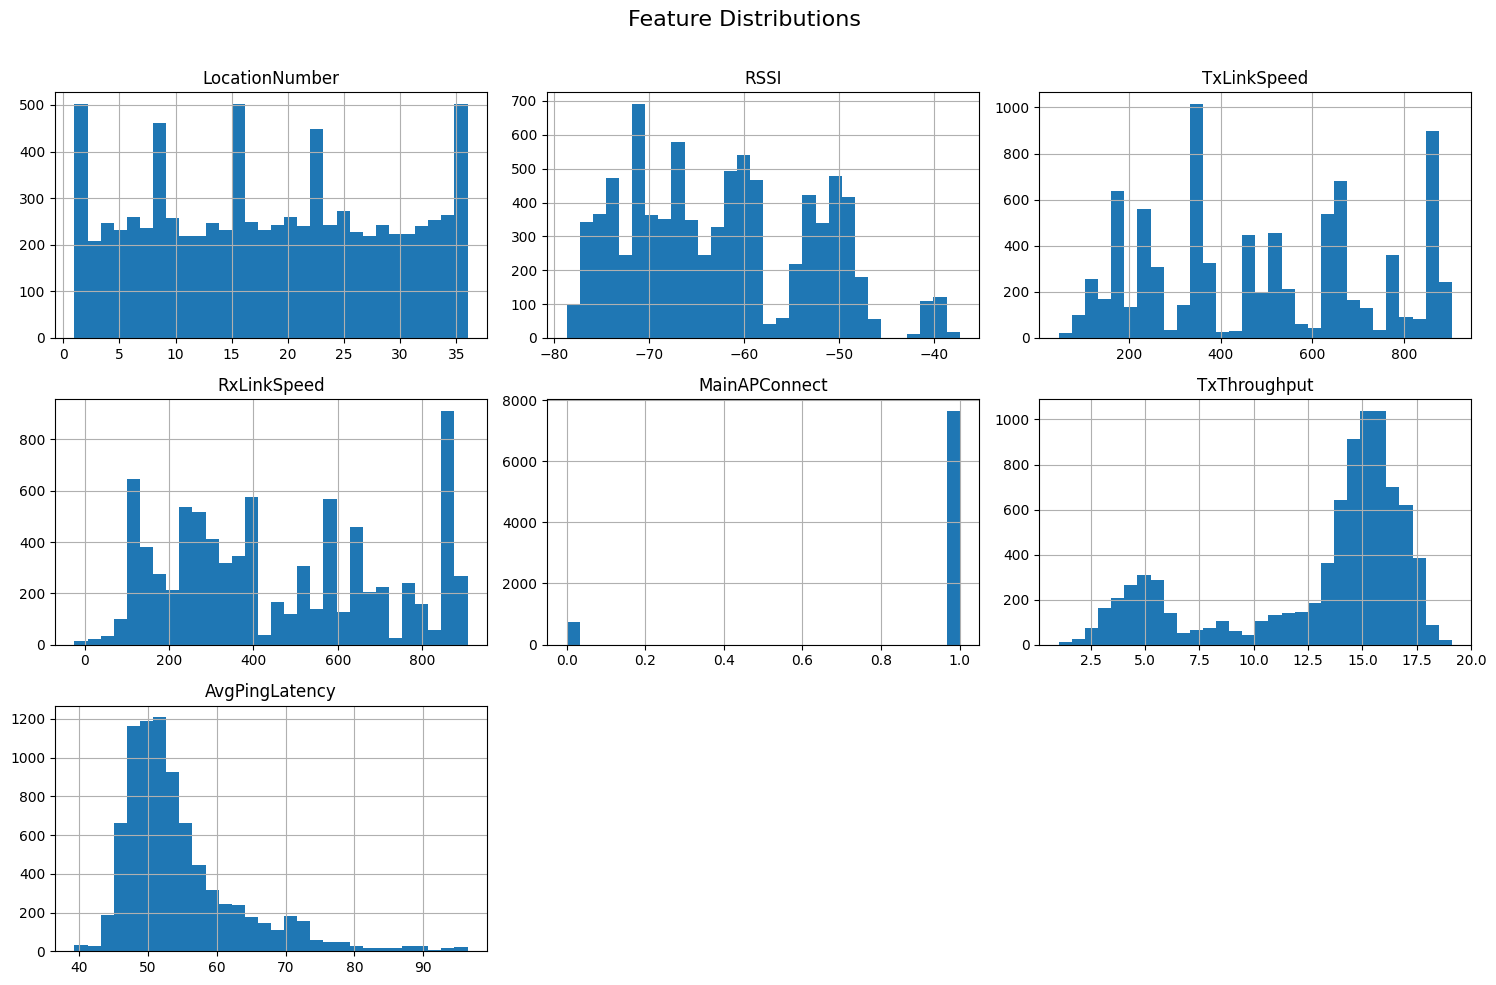

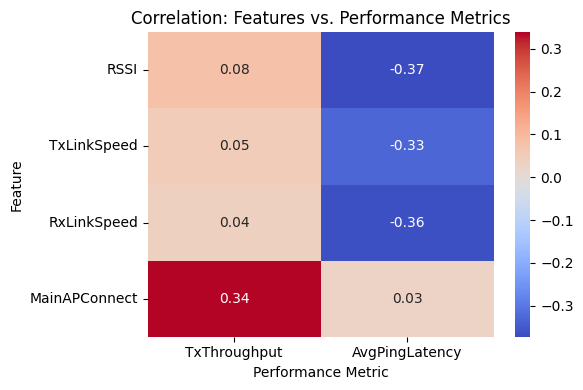

In [ ]:
# ...existing code...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv("test_data.csv")

# Show descriptive statistics
display(df.describe())

# Plot histograms for each feature
df.hist(bins=30, figsize=(15, 10), grid=True)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# Select main features and performance metrics
features = ["RSSI", "TxLinkSpeed", "RxLinkSpeed", "MainAPConnect"]
performance = ["TxThroughput", "AvgPingLatency"]

# Compute correlation matrix between features and performance metrics
corr = df[features + performance].corr()

# Extract only correlations of features with performance metrics
corr_focus = corr.loc[features, performance]

# Plot the focused correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_focus, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation: Features vs. Performance Metrics")
plt.xlabel("Performance Metric")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

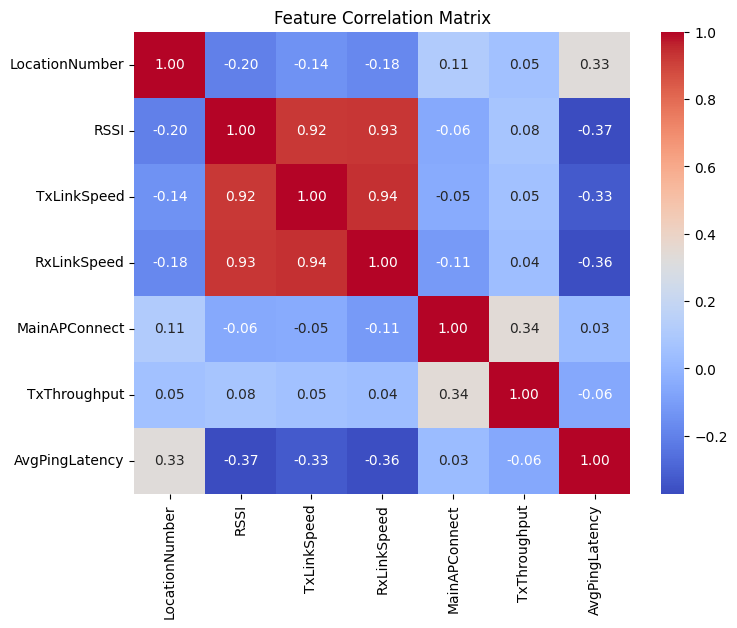

In [ ]:
# Optional: Plot the correlation matrix for all features
# This can be useful for understanding relationships between all features

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

### Part 2 FNNs

Looking at correlation matrixes we can identify that the features 

In [4]:
# Feature selection for modeling

features = ["RSSI", "TxLinkSpeed", "RxLinkSpeed", "MainAPConnect"]
targets = ["TxThroughput", "AvgPingLatency"]

X = df[features]
y = df[targets]

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalize the features (recommended for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# If you need to encode categorical variables, use OneHotEncoder or similar.
# In your case, 'MainAPConnect' is already 0/1, so no encoding is needed.

# Optionally, you can also scale the targets if you want (especially for regression)
from sklearn.preprocessing import MinMaxScaler
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y)

# X_scaled is now ready for training your FNN